# Student name: Dara Corr

# Student ID: 22275193

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline
import pandas as pd

# Task 1a

These functions are provided to assist you in Task 1a

In [ ]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [ ]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [pointOnBoundary(x_min), pointOnBoundary(x_max)]

Please add cells according to your own requirements.

## Reflection

After engaging with your peers, reflect on this task and answer the following questions: 
- How do the found values for Ein and Eout for the various models relate to model complexity?
- Explain how data transformations can lead to linear separability of a dataset.
- Explain how data transformations effect the complexity of your model.

Your reflection..

# Task 1b

In [34]:
def weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [35]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [36]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = linreg_predict(w,X)
    return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

In [37]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((X.reshape(len(X),1),np.array(extra)),1)

To prevent results due to luck, it is useful to repeat your experiments a good few times and look at average results. The below code snippet may be useful in this regard.

In [38]:
#my code
reg_df1 = pd.read_csv('ET2_Regression_Data.csv', names = ['x','y'])
reg_df1.head()

X = reg_df1.x.to_numpy()
y = reg_df1.y.to_numpy()

In [39]:
#code provided to us
error_in = []
error_out = []
repeats = 100
power_range = range(1, 10)#set range to 1-10 - particularly interested in lower N - want to avoid overfitting to training data

for power in power_range: 
    e_in=0
    e_out=0
    for r in range(repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75) ##Choose a suitable training_size XX
        X_train_trans = transPoly(X_train, power)
        X_test_trans = transPoly(X_test,power)
        w = weights(X_train_trans,y_train)
        e_in += calc_error(w,X_train_trans,y_train)
        e_out+= calc_error(w,X_test_trans,y_test)
    error_in.append(e_in/repeats)
    error_out.append(e_out/repeats)

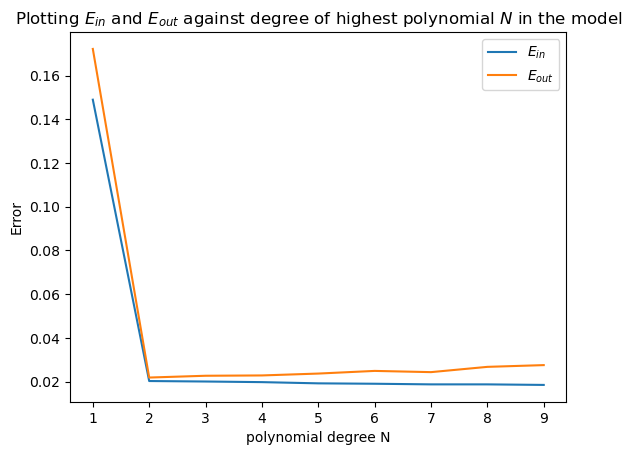

In [40]:
#my code again
N = range(1,10)
plt.plot(N, error_in, label = "$E_{in}$")
plt.plot(N, error_out, label = "$E_{out}$")
plt.title("Plotting $E_{in}$ and $E_{out}$ against degree of highest polynomial $N$ in the model")
plt.xlabel("polynomial degree N")
plt.ylabel("Error")
plt.legend()

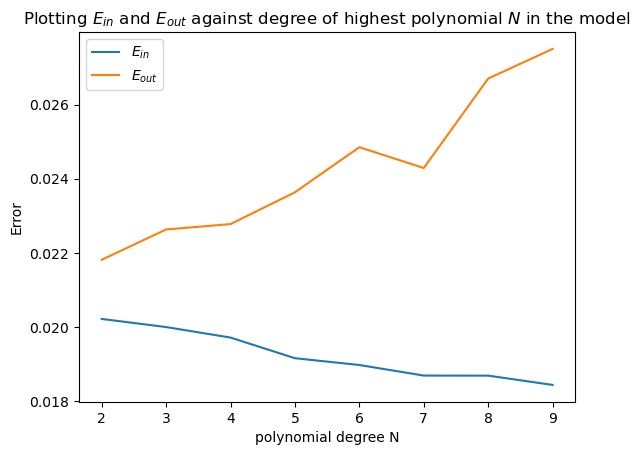

In [41]:
N = range(2,10)
plt.plot(N, error_in[1:], label = "$E_{in}$")
plt.plot(N, error_out[1:], label = "$E_{out}$")
plt.title("Plotting $E_{in}$ and $E_{out}$ against degree of highest polynomial $N$ in the model")
plt.xlabel("polynomial degree N")
plt.ylabel("Error")
plt.legend()

In [42]:
reg_df = pd.read_csv('ET2_Regression_Data.csv', names = ['x','y'])
reg_df.head()

,x,y
0,0.959596,0.366804
1,0.494949,1.182824
2,0.696970,1.149203
3,0.727273,0.947185
4,0.191919,0.412613


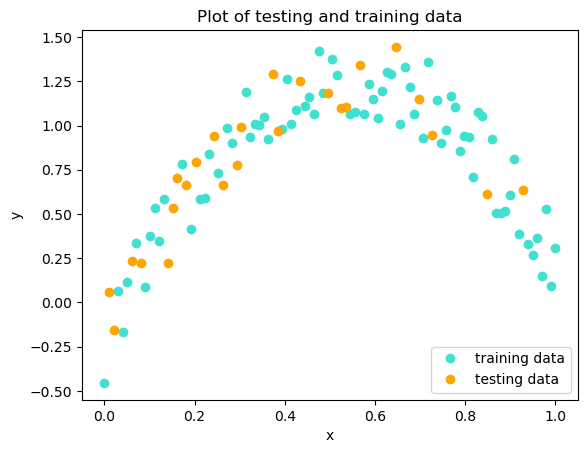

In [43]:
train = reg_df.sample(frac=0.75,random_state=888)
test = reg_df.drop(train.index)

x_train = train.x.to_list()
y_train = train.y.to_list()

x_test = test.x.to_list()
y_test = test.y.to_list()

plt.plot(x_train,y_train, 'o' ,color = 'turquoise', label = 'training data')
plt.plot(x_test,y_test, 'o' ,color = 'orange', label = 'testing data')
plt.legend(loc = 4)
plt.title("Plot of testing and training data")
plt.xlabel("x")
plt.ylabel("y")

#plot different models with different values of N here?
plt.show()

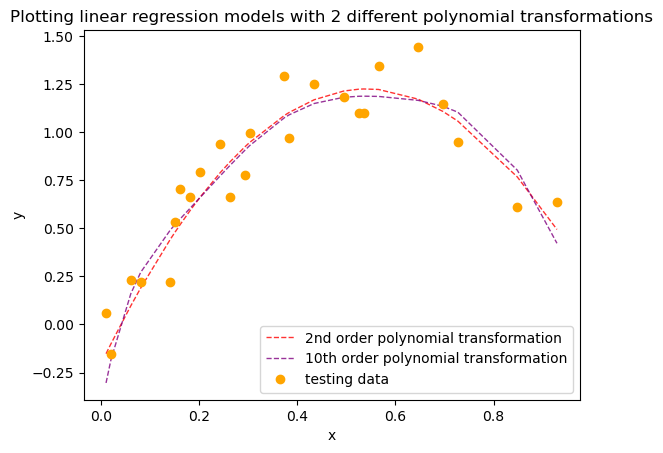

In [44]:
#plotting Polynomial of degree 2 + degree 10 for visualisation purposes

x_train_trans2 = transPoly(np.array(x_train), 2) #generating plot for degree 2 model #set power to 1 to visualise linear regression model
x_test_trans2 = transPoly(np.array(x_test), 2)
w2 = weights(x_train_trans2,y_train)
Y_hat2 = linreg_predict(w2,x_test_trans2)

x_train_trans10 = transPoly(np.array(x_train), 10) #generating plot for degree 10 model
x_test_trans10 = transPoly(np.array(x_test), 10)
w10 = weights(x_train_trans10,y_train)
Y_hat10 = linreg_predict(w10,x_test_trans10)

X1 = x_test[0:]
X2 = x_test[0:]

(X1, Y_hat2) =  zip(*sorted(zip(X1, Y_hat2))) #sorting data for plots
(X2, Y_hat10) = zip(*sorted(zip(X2, Y_hat10)))


plt.plot(X1,Y_hat2, '--' , color = 'red', linewidth = 1 , alpha = 0.8 ,label = "2nd order polynomial transformation")#plotting 2nd order model
plt.plot(X2,Y_hat10, '--' , color = 'purple', linewidth = 1, alpha = 0.8 ,label = "10th order polynomial transformation")#plotting 10th order model

#plt.plot(x_train,y_train, 'o' ,color = 'turquoise', label = 'training data')#plotting testing and training data
plt.plot(x_test,y_test, 'o' ,color = 'orange', label = 'testing data')
plt.legend(loc = 4)
plt.title("Plotting linear regression models with 2 different polynomial transformations")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

I generated the above plot to visualise the difference between how the regression model fits the testing data for 2nd and 10th order polynomial transformations.

## Reflection
After engaging with your peers, reflect on this task and answer the following questions:
- How does the plot of Ein and Eout versus degree of the used polynomial data transformation relate to model complexity?
- How can the choice of transformation that yielded the best results be explained in terms of sample complexity? 

## Answer:

From this analysis, I believe the transformation from $X$ to $X + X^{2}$ (2nd order polynomial transformation) fits the out of sample data the best. Although we are told that we are modelling a polynomial with degree between 5 and 10, the polynomial is noisy and we only have 100 datapoints. Because of what I learned from the Theory of Generalisation, I know that the complexity of a model is determined by the number of data points we have and since we only have 100 datapoints to work with here, the optimal complexity of our model is limited to $d_{vc} \cdot 10$. By plotting $E_{in}$ and $E_{out}$ against degree of highest polynomial term in the transformation (complexity), I found that $|E_{in} - E_{out}|$ was smallest for polynomials of degree N = 2, and the Out of Sample error kept increasing when I increased the degree of the polynomial $N$ further due to the generalisation error increasing. Because we only had 100 data points to work with, this meant that by increasing $N$ more than 2, meant that I was overfitting the model to the training data and it performed poorly in the out of sample data (the testing data). 

- The plot of $E_{in}$ and $E_{out}$ versus degree essentially is a plot of $E_{in}$ and $E_{out}$ vs complexity of the model. As the degree of the polynomial we are fitting to the data increases, this means that there is an extra term in the polynomial being added to the model, i.e. we are adding another feature to the model and increasing its complexity. The greatest error for both $E_{in}$ and $E_{out}$ is found for $N = 1$, which is expected as we do not expect a straight line (polynomial of degree 1) to fit this data well as it is clearly a polynomial of higher degree since it appears concave down when plotted and we are explicitly told that this dataset is a noisy polynomial with degree between 5 and 10. $E_{in}$ and $E_{out}$ greatly reduce by almost a whole order of magnitude when $N$ is increased to 2. This is also the point when the difference between $E_{in}$ and $E_{out}$ is at its smallest. When we increase $N$ further, $E_{in}$ decreases and $E_{out}$ increases. This is a sign that we are overfitting our model to the data. Thus for a final model I would choose a polynomial transformation of max degree $N = 2$ to model this data using linear regression. 
<br> 

- The Choice of transformation that I found performed the best was transforming $X$ to $X + X^2$. Any models with transformations including higher order polynomial terms had higher out of sample errors and lower in sample errors because the model was being overfit to the training data. This is because we only have 100 data points to work with and the optimal model we can create is related to the VC bound and the number of data points we have moreso than what the original data looks like (which is why data-snooping is often frowned upon). The relation $N \approx d_{VC} \cdot 10 $ describes the relation between model complexity and the number of datapoints we have. Since we only have 100 datapoints then we can only fit a model with maximum complexity (the VC bound $d_{vc}$ represents complexity here) of 10. If I had more datapoints we could possibly try transforms of higher degree polynomials but because there are only have 100 datapoints (less than that when some are assigned to testing data) the complexity of our model is limited by the amount of datapoints we have available. Because of how $E_{out}$ and $|E_{in} - E_{out}|$ increase as the number of polynomial terms >2 increases, and also considering Occam's razor - how simpler models tend to perform better than more complex ones, I decided the polynomial transform of $X$ to $X + X^2$ was the best for this model.

# Task 2

Below is an implementation of linear regression with regularization

In [45]:
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion 
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [46]:
#my code
reg_df1 = pd.read_csv('ET2_Regression_Data.csv', names = ['x','y'])
reg_df1.head()

X = reg_df1.x.to_numpy()
y = reg_df1.y.to_numpy()

This code snippet may be useful to keep track of Ein, Eout and the corresponding weights for various regulariser parameters

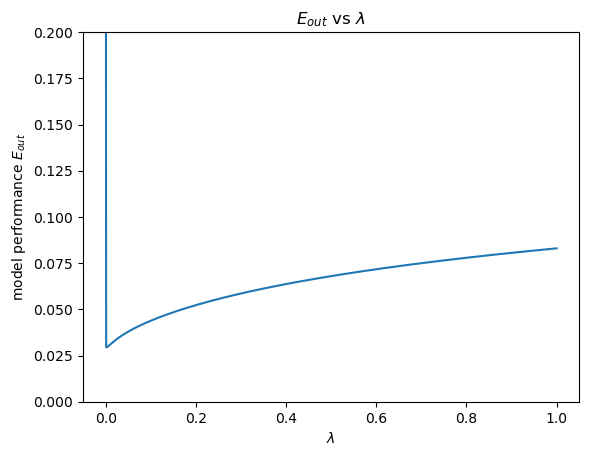

In [119]:
ein=[]
eout=[]
weights=[]
lambdas = np.linspace(0,1,1000) # lambda seems to keep increasing after optimal lambda value 
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =10)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)
    
plt.plot(lambdas,eout)
plt.title("$E_{out}$ vs $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("model performance $E_{out}$")
plt.ylim((0,0.2))
plt.show()

Please add cells according to your own requirements.

In [120]:
#lambda = 0, corresponds to model with no regularisation applied

def min_index(a):
    index = a.index(min(a))
    return index

k = min_index(eout)
    
lambda_opt = lambdas[k]
print("Optimal Lambda value = {0:.8f}".format(lambda_opt)) #lambda value that minimizes e_out
print("Optimal Eout value = {0:.8f}".format(eout[k])) #min e_out val

Optimal Lambda value = 0.00200200
Optimal Eout value = 0.02946082


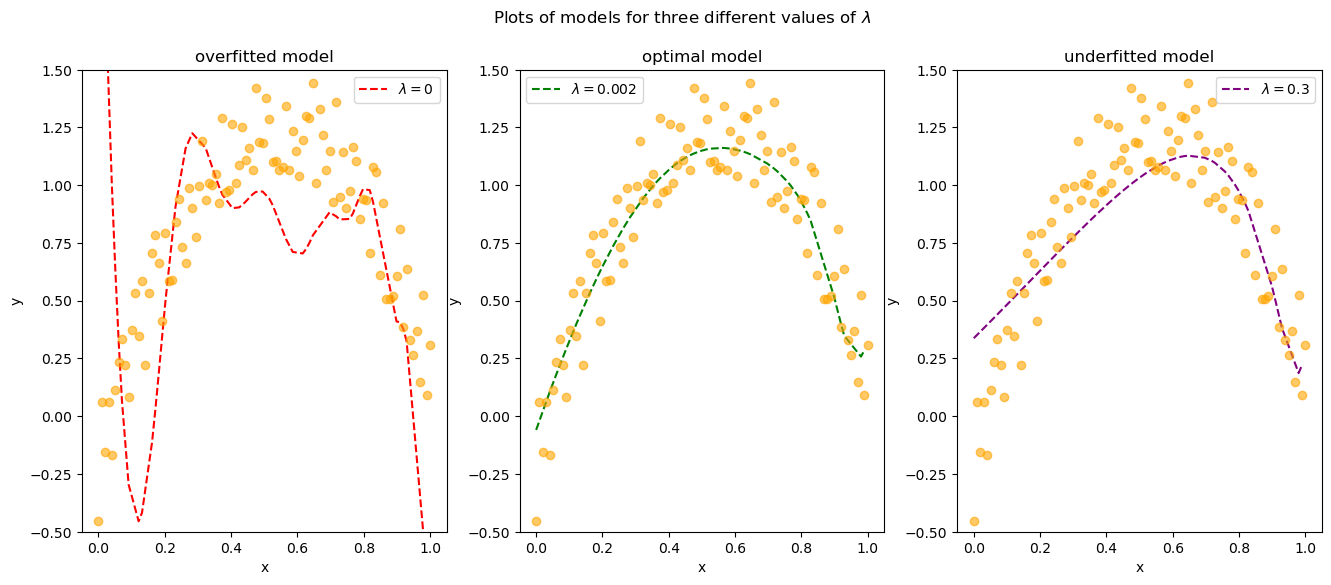

In [121]:
#plotting overfitting, optimal fit and underfitting by changing lambda values

X_trans = transPoly(X,50)
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =10)


w1 = weights_reg(X_train,y_train,0)
y_hat1 = linreg_predict(w1,X_test)

w2 = weights_reg(X_train,y_train,lambda_opt)
y_hat2 = linreg_predict(w2,X_test)

w3 = weights_reg(X_train,y_train,0.3)
y_hat3 = linreg_predict(w3,X_test)


X1 = X_test[:,0]
X2 = X_test[:,0]
X3 = X_test[:,0]    
    
(X1, y_hat1) =  zip(*sorted(zip(X1, y_hat1))) #sorting data for plots
(X2, y_hat2) =  zip(*sorted(zip(X2, y_hat2)))
(X3, y_hat3) =  zip(*sorted(zip(X3, y_hat3)))

#fig, axs = plt.subplots(3, figsize = (10,10))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.suptitle('Plots of models for three different values of $\lambda$')
axs[0].plot(X1 , y_hat1, '--', color = 'red', label = "$\lambda = 0$")
axs[1].plot(X2 , y_hat2, '--', color = 'green', label = "$\lambda = 0.002$")
axs[2].plot(X3 , y_hat3, '--', color = 'purple', label = "$\lambda = 0.3$")

axs[0].plot(X,y, 'o' ,color = 'orange', alpha = 0.6)
axs[1].plot(X,y, 'o' ,color = 'orange', alpha = 0.6)
axs[2].plot(X,y, 'o' ,color = 'orange', alpha = 0.6)

axs[0].set_ylim([-0.5, 1.5])
axs[1].set_ylim([-0.5, 1.5])
axs[2].set_ylim([-0.5, 1.5])

axs[0].legend()
axs[1].legend()
axs[2].legend()

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

axs[0].set_title("overfitted model")
axs[1].set_title("optimal model")
axs[2].set_title("underfitted model")

plt.show()

In [ ]:
eout = calc_error(w2,X_test,y_test)
print("E out = {0:.5f}".format(eout))

## Reflection

In your reflection, makes sure to answer the following questions:
- Interpret the information in the requested figures.
- Explain the strategy chosen to decide on the optimum amount of regularisation.
- Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.

- From the figures I plotted above, I found for small lambda values (i.e. $\lambda = 0$ above) that overfitting occurs. The regularisation term $\lambda$ does not have enough of an effect on the model. I found that the optimal lambda to fit the data was $\lambda = 0.002$ for this particular random state. And then for very large lambda values, underfitting occurs and the model tends towards a horizontal straight line. This can be interpreted as the regulariser "putting on the brakes" too much.


- To decide on the optimum amount of regularisation, A value of lambda is chosen so that it gives a good trade-off between bias and variance. The over-fitting example has too much variance, whereas the example where the model-underfits the data has too much bias. In this particular case, I plotted $E_{out}$ vs $\lambda$ and chose the lambda value with the smallest corresponding $E_{out}$ value. Ususally the optimum amount of regularisation is found through the process of validation, in practice.


- The l*np.identity(m.shape[0]) term in the pseudo-inverse is the regularisation term in the expression for $w_{reg}$. The full expression being $w_{reg} = (z^T z + \lambda I_{m})^{-1} z^{T} y$. By setting $\lambda = 0$ we get the term for the weights for linear regression without any regularisation being applied $\rightarrow w_{lin} = (z^{T} z)^{-1} z^{T} y$. The lambda parameter in particular controls the amount of regularisation being applied to the model. 

# Task 3

Please add cells according to your own requirements.

In [122]:
reg_df1 = pd.read_csv('ET2_Regression_Data.csv', names = ['x','y'])
reg_df1.head()

X = reg_df1.x.to_numpy()
y = reg_df1.y.to_numpy()

In [123]:
#implement 10fold cv on code snippet from task 2 using KFold


ein=[]
eout=[]
weights=[]
lambdas = np.linspace(0,1,1000) # choose a suitable range of lambdas here
X_trans = transPoly(X,50)

e_out_array = []
e_in_array = []

kf = KFold(n_splits=10, random_state=10, shuffle=True)
for (i, (train_index, test_index)) in enumerate(kf.split(X_trans)): #split data into folds and iterate through the folds
    for l in lambdas:    #iterate through each lambda value for each fold
        w = weights_reg(X_trans[train_index],y[train_index],l) #apply weights
        ein.append(calc_error(w,X_trans[train_index],y[train_index])) #calc ein and store it
        eout.append(calc_error(w,X_trans[test_index],y[test_index])) #calc eout and store it
        #weights.append(w)
    e_out_array.insert(i,eout) #store errors-out in new column in matrix
    e_in_array.insert(i,ein) #store errors-in in new column in matrix
    eout,ein = [],[] #set error arrays empty to be stored again in next fold

Eout = np.array(e_out_array) #matrix of errors -> column index corresponds to each fold and row index corresponds to each lambda
Ein = np.array(e_in_array)

e_outf = np.average(Eout, axis=0) #average accross the columns (folds) to find the average error for each lambda 
e_inf = np.average(Ein, axis=0)

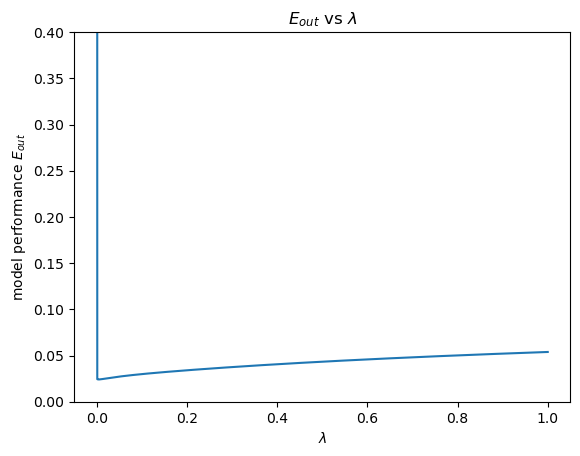

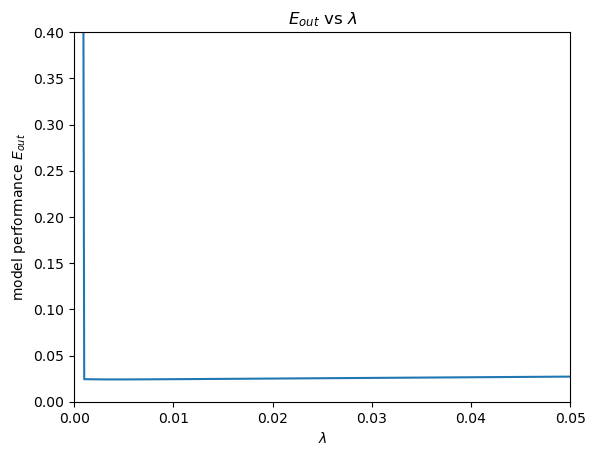

In [124]:
#plots
plt.plot(lambdas,e_outf)
plt.title("$E_{out}$ vs $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("model performance $E_{out}$")
plt.ylim((0, 0.4))
plt.show()

#plots
plt.plot(lambdas,e_outf)
plt.title("$E_{out}$ vs $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("model performance $E_{out}$")
plt.ylim((0, 0.4))
plt.xlim((0,0.05))
plt.show()

In [125]:
avg_e_outs = e_outf.tolist()
j = min_index(avg_e_outs)
lambda_opt_kf = lambdas[j]
print("Optimum lambda value from 10-fold CV = {0:.8f} ".format(lambda_opt_kf))
print("Optimal Eout value = {0:.8f}".format(avg_e_outs[j])) #min e_out val

Optimum lambda value from 10-fold CV = 0.00400400 
Optimal Eout value = 0.02411217


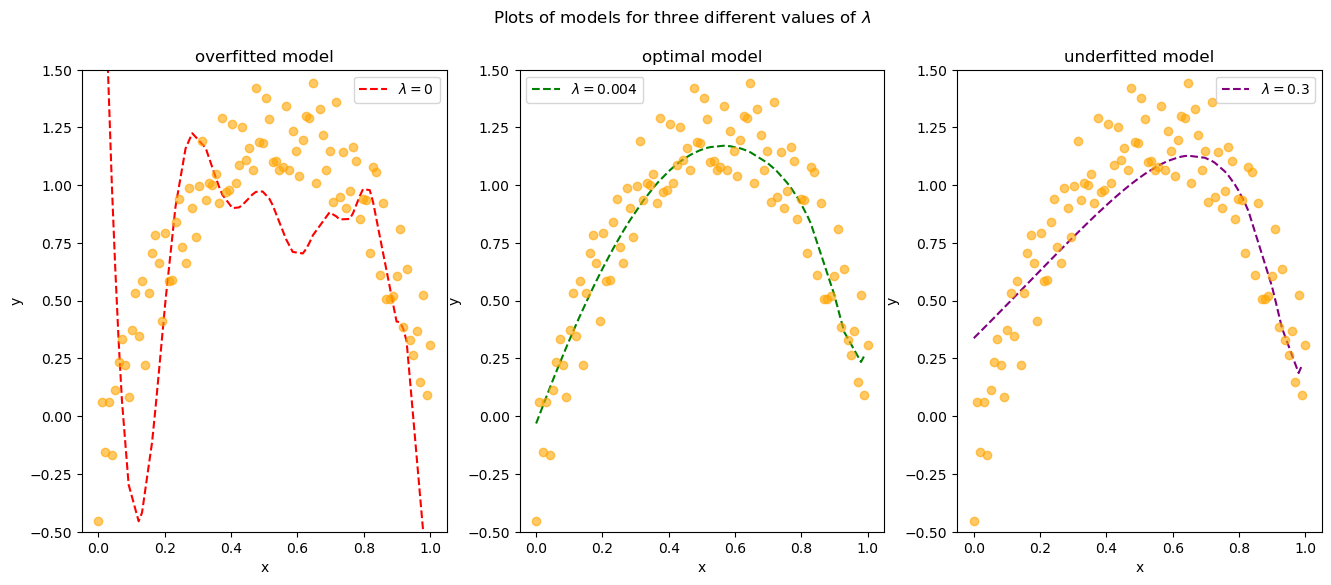

In [126]:
X_trans = transPoly(X,50)
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =10)


w1 = weights_reg(X_train,y_train,0)
y_hat1 = linreg_predict(w1,X_test)

w2 = weights_reg(X_train,y_train,lambda_opt_kf)#new optimum lambda value added from result of 10Fold CV
y_hat2 = linreg_predict(w2,X_test)

w3 = weights_reg(X_train,y_train,0.3)
y_hat3 = linreg_predict(w3,X_test)


X1 = X_test[:,0]
X2 = X_test[:,0]
X3 = X_test[:,0]    
    
(X1, y_hat1) =  zip(*sorted(zip(X1, y_hat1))) #sorting data for plots
(X2, y_hat2) =  zip(*sorted(zip(X2, y_hat2)))
(X3, y_hat3) =  zip(*sorted(zip(X3, y_hat3)))

#fig, axs = plt.subplots(3, figsize = (10,10))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.suptitle('Plots of models for three different values of $\lambda$')
axs[0].plot(X1 , y_hat1, '--', color = 'red', label = "$\lambda = 0$")
axs[1].plot(X2 , y_hat2, '--', color = 'green', label = "$\lambda = 0.004$")
axs[2].plot(X3 , y_hat3, '--', color = 'purple', label = "$\lambda = 0.3$")

axs[0].plot(X,y, 'o' ,color = 'orange', alpha = 0.6)
axs[1].plot(X,y, 'o' ,color = 'orange', alpha = 0.6)
axs[2].plot(X,y, 'o' ,color = 'orange', alpha = 0.6)

axs[0].set_ylim([-0.5, 1.5])
axs[1].set_ylim([-0.5, 1.5])
axs[2].set_ylim([-0.5, 1.5])

axs[0].legend()
axs[1].legend()
axs[2].legend()

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

axs[0].set_title("overfitted model")
axs[1].set_title("optimal model")
axs[2].set_title("underfitted model")

plt.show()

In [55]:
print(w2)

[-0.03153623  3.81961826 -1.99414338 -1.70437131 -0.51478501  0.24051285
  0.50375596  0.4644422   0.29028176  0.08563019 -0.09572161 -0.23181144
 -0.31840616 -0.36007851 -0.36502634 -0.34226193 -0.30020843 -0.24609508
 -0.18578555 -0.12382658 -0.06359678 -0.00748982  0.04290216  0.08662118
  0.12319845  0.152533    0.17479258  0.19033419  0.19964143  0.20327594
  0.20184024  0.19594993  0.18621328  0.17321673  0.15751491  0.13962426
  0.12001937  0.09913134  0.07734766  0.0550132   0.03243195  0.00986933
 -0.0124453  -0.03431583 -0.05557659 -0.07608956 -0.09574166 -0.11444214
 -0.13212014 -0.14872239 -0.16421108]


In [127]:
error = mean_squared_error(y_test, y_hat2)
print("test MSE = {0:.4f}".format(error))

eout_kfold = calc_error(w2,X_test,y_test)
print("E out = {0:.5f}".format(eout_kfold))


test MSE = 0.3810
E out = 0.02970


## Reflection
In your reflection, explain the procedure followed by using KFOLDS and your choice of parameters. 

KFOLD cross validation splits the dataset into K folds, with 1 for testing at each step and the remaining K-1 folds for training. Here I used 10-fold cross validation, this means that 10 datapoints from one fold are taken for testing and the other 90 datapoints in the other 9 folds are used for training the model. For each fold, iterate through the 1000 lambda values (regularisation parameter) and the Eout value for each lambda value is calculated within each fold. The Error out for each lambda value is averaged over the 10 folds to get an average value of Eout for each lambda value. 

Now, I have a good idea of what lambda value can be used to regularise the model so that Eout is minimized. I have a good idea that this will work for unseen data because I tested it on 10 subsets of the dataset as training data during the Kfold CV procedure. I now have a more reliable estimate for the optimal lambda value $\lambda$ for regularisation on unseen data with this model, since the cross-fold validation process looks at multiple folds and not just one fold like what was carried out in Task 2.

Using 10-fold CV in task 3 gave me a slightly different value of $\lambda$ than I obtained in Task 2, in task 2 I found the optimum lambda value was $\lambda = 0.002$, and after 10-fold CV I found the optimum lambda value to be $\lambda = 0.004$. I expected this, since we only looked at one fold in task2, but now I look at multiple folds to get a better idea of what lambda value I would expect to perform best on average on unseen data.

# Task 4

In [94]:
reg_df1 = pd.read_csv('ET2_Regression_Data.csv', names = ['x','y'])
reg_df1.head()

X = reg_df1.x.to_numpy()
y = reg_df1.y.to_numpy()

In [130]:
#Ridge CV:
lambdas = np.linspace(0,1,1000) # choose a suitable range of lambdas here
X_trans = transPoly(X,50)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =10)

RidgeModel = RidgeCV(alphas=lambdas[1:], cv=10)
RidgeModel.fit(X_train,y_train)#fits ridge regression model

RidgeCV(alphas=array([0.001001  , 0.002002  , 0.003003  , 0.004004  , 0.00500501,
       0.00600601, 0.00700701, 0.00800801, 0.00900901, 0.01001001,
       0.01101101, 0.01201201, 0.01301301, 0.01401401, 0.01501502,
       0.01601602, 0.01701702, 0.01801802, 0.01901902, 0.02002002,
       0.02102102, 0.02202202, 0.02302302, 0.02402402, 0.02502503,
       0.02602603, 0.02702703, 0.02802803, 0.02902903, 0.03003003,
       0.0310...
       0.96696697, 0.96796797, 0.96896897, 0.96996997, 0.97097097,
       0.97197197, 0.97297297, 0.97397397, 0.97497497, 0.97597598,
       0.97697698, 0.97797798, 0.97897898, 0.97997998, 0.98098098,
       0.98198198, 0.98298298, 0.98398398, 0.98498498, 0.98598599,
       0.98698699, 0.98798799, 0.98898899, 0.98998999, 0.99099099,
       0.99199199, 0.99299299, 0.99399399, 0.99499499, 0.995996  ,
       0.996997  , 0.997998  , 0.998999  , 1.        ]),
        cv=10)

In [131]:
print(RidgeModel.coef_) #print weights - ridge doesnt do feature selection
w = RidgeModel.coef_

[ 3.94872417e+00 -2.20873862e+00 -1.79330532e+00 -4.46045747e-01
  3.77715472e-01  6.33909829e-01  5.49318581e-01  3.20001172e-01
  6.60991016e-02 -1.51907965e-01 -3.10704035e-01 -4.07397252e-01
 -4.49006315e-01 -4.46408189e-01 -4.11094654e-01 -3.53586870e-01
 -2.82784096e-01 -2.05813365e-01 -1.28129303e-01 -5.37232398e-02
  1.46345731e-02  7.51585877e-02  1.26835404e-01  1.69241560e-01
  2.02392199e-01  2.26618277e-01  2.42468776e-01  2.50634107e-01
  2.51887091e-01  2.47038256e-01  2.36902659e-01  2.22275861e-01
  2.03917117e-01  1.82538171e-01  1.58796365e-01  1.33291031e-01
  1.06562322e-01  7.90918489e-02  5.13045837e-02  2.35716494e-02
 -3.78632529e-03 -3.04955176e-02 -5.63250687e-02 -8.10832187e-02
 -1.04613516e-01 -1.26791169e-01 -1.47519581e-01 -1.66727106e-01
 -1.84364033e-01 -2.00399809e-01]


In [132]:
print(RidgeModel.alpha_) #gets optimum lambda (alpha) value

lambda_opt_ridge = float(RidgeModel.alpha_)

0.003003003003003003


test MSE = 0.0295
Eout = 0.029540


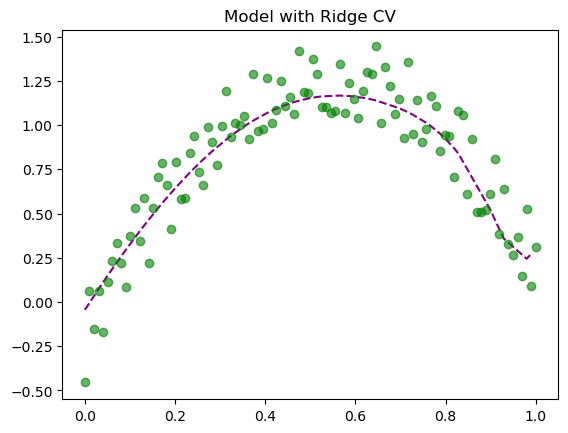

In [133]:
#plots and errors
rig = Ridge(alpha = lambda_opt_ridge)
rig.fit(X_train,y_train)
y_pred_ridge = rig.predict(X_test)

yplot = y_pred_ridge[:] 
X1 = X_test[:,0]
(X1, yplot) =  zip(*sorted(zip(X1, yplot)))


plt.plot(X1,yplot, '--', color = 'purple')
plt.plot(X,y,'o',color = 'green',alpha = 0.6)
plt.title("Model with Ridge CV")

error = mean_squared_error(y_test, y_pred_ridge)
print("test MSE = {0:.4f}".format(error))


#(pred-np.array(y)).dot(pred-np.array(y))/len(X)

eout_ridge = ((y_pred_ridge - np.array(y_test)).dot(y_pred_ridge - np.array(y_test)))/len(X_test)
print("Eout = {0:.6f}".format(eout_ridge))


In [114]:
#####################################################
#Lasso:

reg_df1 = pd.read_csv('ET2_Regression_Data.csv', names = ['x','y'])
reg_df1.head()

X = reg_df1.x.to_numpy()
y = reg_df1.y.to_numpy()

lambdas = np.linspace(0,1,1000) # choose a suitable range of lambdas here
X_trans = transPoly(X,50)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =10)

LassoModel = LassoCV(alphas=lambdas[1:], cv=10, max_iter = 10000).fit(X_train,y_train)
print(LassoModel)

LassoCV(alphas=array([0.001001  , 0.002002  , 0.003003  , 0.004004  , 0.00500501,
       0.00600601, 0.00700701, 0.00800801, 0.00900901, 0.01001001,
       0.01101101, 0.01201201, 0.01301301, 0.01401401, 0.01501502,
       0.01601602, 0.01701702, 0.01801802, 0.01901902, 0.02002002,
       0.02102102, 0.02202202, 0.02302302, 0.02402402, 0.02502503,
       0.02602603, 0.02702703, 0.02802803, 0.02902903, 0.03003003,
       0.0310...
       0.96696697, 0.96796797, 0.96896897, 0.96996997, 0.97097097,
       0.97197197, 0.97297297, 0.97397397, 0.97497497, 0.97597598,
       0.97697698, 0.97797798, 0.97897898, 0.97997998, 0.98098098,
       0.98198198, 0.98298298, 0.98398398, 0.98498498, 0.98598599,
       0.98698699, 0.98798799, 0.98898899, 0.98998999, 0.99099099,
       0.99199199, 0.99299299, 0.99399399, 0.99499499, 0.995996  ,
       0.996997  , 0.997998  , 0.998999  , 1.        ]),
        cv=10, max_iter=10000)


Optimum Lambda value = 0.001001
[ 2.90545446 -0.         -2.87146039 -0.05445899 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.19760107]


Text(0.5, 1.0, 'Model with Lasso CV')

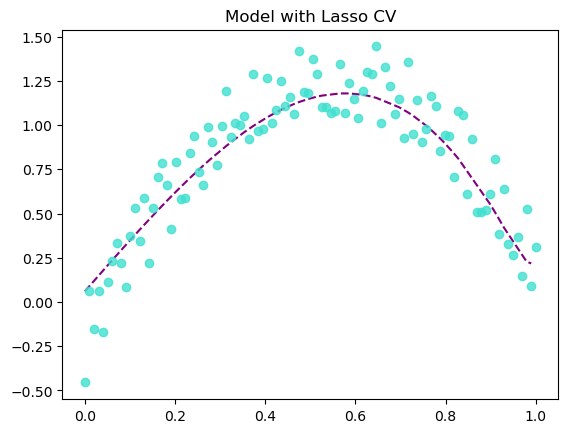

In [134]:
LassoModel.fit(X_train,y_train) 
print("Optimum Lambda value = {0:.6f}".format(LassoModel.alpha_))
print(LassoModel.coef_)

lambda_opt_lasso = LassoModel.alpha_

y_pred_lasso = LassoModel.predict(X_test)

yplot = y_pred_lasso[:] 
X1 = X_test[:,0]
(X1, yplot) =  zip(*sorted(zip(X1, yplot)))


plt.plot(X1,yplot, '--', color = 'purple')
plt.plot(X,y,'o',color = 'turquoise',alpha = 0.8)
plt.title("Model with Lasso CV")



In [135]:
error = mean_squared_error(y_test, y_pred_lasso)
print("test MSE = {0:.4f}".format(error))


#(pred-np.array(y)).dot(pred-np.array(y))/len(X)

eout_lasso = ((y_pred_lasso - np.array(y_test)).dot(y_pred_lasso - np.array(y_test)))/len(X_test)
print("Eout = {0:.6f}".format(eout_lasso))


test MSE = 0.0320
Eout = 0.032014


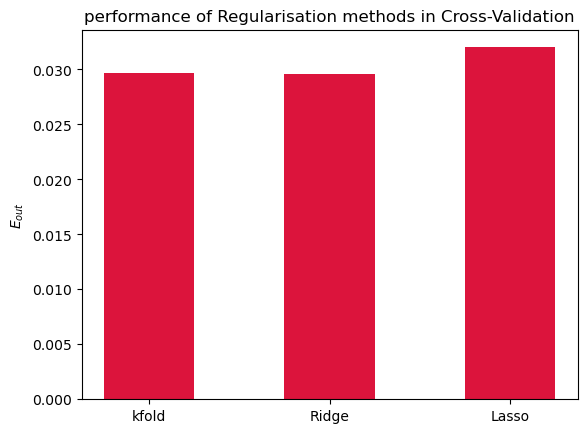

In [136]:
errors = [eout_kfold,eout_ridge,eout_lasso]
cvs = ["kfold","Ridge","Lasso"]
plt.bar(cvs,errors,color = 'crimson',width = 0.5)
plt.ylabel("$E_{out}$")
plt.title("performance of Regularisation methods in Cross-Validation")
plt.show()

In [137]:
print(errors)

[0.029700366281046994, 0.029540086179702038, 0.03201445771326535]


In [138]:
lam = [lambda_opt_kf, lambda_opt_ridge, lambda_opt_lasso]

print(lam)

[0.004004004004004004, 0.003003003003003003, 0.001001001001001001]


## Reflection

Please reflect on the following:
- Observe the resulting error and l (lambda), and compare these to previous results. What do you see? Is this what you expected?
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

- From running Kfold, Ridge and Lasso Cross-Validation on this regression model, I found that the errors for K-fold and Ridge CV were quite similar with Ridge CV performing the best. Lasso CV performed slightly worse than the other two CV methods I used, with a larger Eout value as seen in the above histogram.


- I noticed some differences between the 3 lambda values obtained from the different Cross-validation methods. For the first 10-fold CV I did, I found that $\lambda = 0.004$. Using RidgeCV I found $\lambda = 0.003$ and using LassoCV I found that $\lambda = 0.001$. 


- I also noticed that Ridge CV penalised features more than K-fold CV regression, with some features having small coefficients but none of them are 0, which means that RidgeCV does not perform feature selection. However, LassoCV does perform feature selection and I noticed that most of the weights were set to 0 when using LassoCV. Only 4 of the weights were left with non-zero values after I performed LassoCV on the model. 


- I think that the lambda values are smaller for the models with RidgeCV and LassoCV applied because as features are penalised or removed, the model has more freedom and flexibility than it did before and it needs more regularisation to fit the data better.
